<a href="https://colab.research.google.com/github/abhishekvarma33/DeepLearning-Neural-Netwoks-ANN/blob/master/Predict_total_cost_per_patient_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook includes
**1) Packages Installation for R ,
2) Load Libraries ,
3) Data Preparation and EDA ,
4) Data Preprocessing ,
5) Feature Engineering
6) Model Selection and Training
7) Evaluation and model improvement ,
8) Final Prediction, Insights and Results**




#1) Package Installation

In [24]:
install.packages('IRkernel')
IRkernel::installspec(user = FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
install.packages(c('forecast', 'tseries'))
install.packages("ggplot2")
library(forecast)
library(ggplot2)
install.packages("caret")

# Install and load the IRdisplay package if not already installed
install.packages("IRdisplay")
library(IRdisplay)

install.packages("randomForest")
library(randomForest)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [26]:
# Load necessary libraries

library(tidyverse)
library(lubridate)
library(readr)


Upload CSV files and load into dataframe

In [27]:
# Specify the path to the uploaded CSV file
csv_path <- "/bill_amount.csv"  # Update with the actual path

# Read the CSV file into a data frame
data_bill_amount <- read_csv(csv_path)

Rows: 13600 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): bill_id, amount

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [28]:
csv_path <- "/bill_id.csv"  # Update with the actual path

# Read the CSV file into a data frame
data_bill_id <- read_csv(csv_path)

Rows: 13600 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): patient_id
dbl  (1): bill_id
date (1): date_of_admission

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [29]:
csv_path <- "/clinical_data.csv"  # Update with the actual path

# Read the CSV file into a data frame
data_clinical <- read_csv(csv_path)

Rows: 3400 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): id, medical_history_3
dbl  (22): medical_history_1, medical_history_2, medical_history_4, medical_...
date  (2): date_of_admission, date_of_discharge

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [30]:
csv_path <- "/demographics.csv"  # Update with the actual path

# Read the CSV file into a data frame
data_demographics <- read_csv(csv_path)

Rows: 3000 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): patient_id, gender, race, resident_status
date (1): date_of_birth

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Statistics of each dataset

In [31]:
summary(data_bill_id)

    bill_id           patient_id        date_of_admission   
 Min.   :5.584e+05   Length:13600       Min.   :2011-01-01  
 1st Qu.:2.486e+09   Class :character   1st Qu.:2012-03-27  
 Median :4.993e+09   Mode  :character   Median :2013-07-10  
 Mean   :5.007e+09                      Mean   :2013-07-02  
 3rd Qu.:7.525e+09                      3rd Qu.:2014-09-24  
 Max.   :1.000e+10                      Max.   :2015-12-28  

In [32]:
summary(data_bill_amount)

    bill_id              amount       
 Min.   :5.584e+05   Min.   :   79.5  
 1st Qu.:2.486e+09   1st Qu.:  950.7  
 Median :4.993e+09   Median : 1517.0  
 Mean   :5.007e+09   Mean   : 5464.8  
 3rd Qu.:7.525e+09   3rd Qu.: 7307.1  
 Max.   :1.000e+10   Max.   :81849.8  

In [33]:
summary(data_clinical)

      id            date_of_admission    date_of_discharge    medical_history_1
 Length:3400        Min.   :2011-01-01   Min.   :2011-01-11   Min.   :0.0000   
 Class :character   1st Qu.:2012-03-27   1st Qu.:2012-04-08   1st Qu.:0.0000   
 Mode  :character   Median :2013-07-10   Median :2013-07-21   Median :0.0000   
                    Mean   :2013-07-02   Mean   :2013-07-13   Mean   :0.1691   
                    3rd Qu.:2014-09-24   3rd Qu.:2014-10-04   3rd Qu.:0.0000   
                    Max.   :2015-12-28   Max.   :2016-01-11   Max.   :1.0000   
                                                                               
 medical_history_2 medical_history_3  medical_history_4 medical_history_5
 Min.   :0.0000    Length:3400        Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.0000    Class :character   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.0000    Mode  :character   Median :0.00000   Median :0.00000  
 Mean   :0.3113                       Mean   :0.05206   Mean   :

In [34]:
summary(data_demographics)

  patient_id           gender              race           resident_status   
 Length:3000        Length:3000        Length:3000        Length:3000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 date_of_birth       
 Min.   :1930-01-20  
 1st Qu.:1948-07-08  
 Median :1962-10-27  
 Mean   :1961-01-01  
 3rd Qu.:1973-09-09  
 Max.   :1990-12-15  

#Data Preparation
Vaidating Duplicates,
Outlier detection,
joining all datasets together using appropriate join condition

In [35]:
# Check for duplicates in the entire data_bill_amount data frame
duplicates <- duplicated(data_bill_amount$bill_id)

# Display the rows with duplicates
data_bill_amount[duplicates, ]

bill_id,amount
<dbl>,<dbl>


In [36]:
# Check for duplicates in the entire data_bill_amount data frame
duplicates <- duplicated(data_bill_id$bill_id)

# Display the rows with duplicates
data_bill_id[duplicates, ]

bill_id,patient_id,date_of_admission
<dbl>,<chr>,<date>


Joining all CSV files to achieve a single data set

In [37]:

# Perform an outer join to include all data fields
df_bill <- merge(data_bill_id, data_bill_amount, by = "bill_id", all = TRUE)

# Display the merged data frame
summary(df_bill)


    bill_id           patient_id        date_of_admission        amount       
 Min.   :5.584e+05   Length:13600       Min.   :2011-01-01   Min.   :   79.5  
 1st Qu.:2.486e+09   Class :character   1st Qu.:2012-03-27   1st Qu.:  950.7  
 Median :4.993e+09   Mode  :character   Median :2013-07-10   Median : 1517.0  
 Mean   :5.007e+09                      Mean   :2013-07-02   Mean   : 5464.8  
 3rd Qu.:7.525e+09                      3rd Qu.:2014-09-24   3rd Qu.: 7307.1  
 Max.   :1.000e+10                      Max.   :2015-12-28   Max.   :81849.8  

Joined bill and bill_amounts using outer join [using bill_id as primary key]
In next step joining demographics and joined bill df [using patient id as primary key]

In [38]:
# Perform an outer join to include all data fields
df_bill_demo <- merge(df_bill, data_demographics, by = "patient_id", all = TRUE)

# Display the merged data frame
summary(df_bill_demo)

  patient_id           bill_id          date_of_admission        amount       
 Length:13600       Min.   :5.584e+05   Min.   :2011-01-01   Min.   :   79.5  
 Class :character   1st Qu.:2.486e+09   1st Qu.:2012-03-27   1st Qu.:  950.7  
 Mode  :character   Median :4.993e+09   Median :2013-07-10   Median : 1517.0  
                    Mean   :5.007e+09   Mean   :2013-07-02   Mean   : 5464.8  
                    3rd Qu.:7.525e+09   3rd Qu.:2014-09-24   3rd Qu.: 7307.1  
                    Max.   :1.000e+10   Max.   :2015-12-28   Max.   :81849.8  
    gender              race           resident_status    date_of_birth       
 Length:13600       Length:13600       Length:13600       Min.   :1930-01-20  
 Class :character   Class :character   Class :character   1st Qu.:1948-06-13  
 Mode  :character   Mode  :character   Mode  :character   Median :1962-10-06  
                                                          Mean   :1960-12-17  
                                                    

In [39]:
data_clinical <- data_clinical %>%
  rename(patient_id = id)

In [108]:
# Perform an outer join to include all data fields
df <- merge(df_bill_demo, data_clinical, by = "patient_id", all = TRUE)

# Display the merged data frame
summary(df)

  patient_id           bill_id          date_of_admission.x      amount       
 Length:16976       Min.   :5.584e+05   Min.   :2011-01-01   Min.   :   79.5  
 Class :character   1st Qu.:2.491e+09   1st Qu.:2012-03-26   1st Qu.:  951.8  
 Mode  :character   Median :5.000e+09   Median :2013-07-08   Median : 1515.7  
                    Mean   :4.999e+09   Mean   :2013-07-02   Mean   : 5457.6  
                    3rd Qu.:7.499e+09   3rd Qu.:2014-09-24   3rd Qu.: 7307.1  
                    Max.   :1.000e+10   Max.   :2015-12-28   Max.   :81849.8  
                                                                              
    gender              race           resident_status    date_of_birth       
 Length:16976       Length:16976       Length:16976       Min.   :1930-01-20  
 Class :character   Class :character   Class :character   1st Qu.:1948-04-06  
 Mode  :character   Mode  :character   Mode  :character   Median :1962-08-12  
                                                    

#Joined all dataframes into df and ready to use a combined dataset and perform data preparation and preprocessing

In [109]:
# Convert "yes" to 1 and "no" to 0
df$medical_history_3 <- ifelse(tolower(df$medical_history_3) == "yes", 1, ifelse(tolower(df$medical_history_3) == "no", 0, df$medical_history_3))
df$medical_history_3 <- as.integer(df$medical_history_3)
# Print the modified dataframe
summary(df)

  patient_id           bill_id          date_of_admission.x      amount       
 Length:16976       Min.   :5.584e+05   Min.   :2011-01-01   Min.   :   79.5  
 Class :character   1st Qu.:2.491e+09   1st Qu.:2012-03-26   1st Qu.:  951.8  
 Mode  :character   Median :5.000e+09   Median :2013-07-08   Median : 1515.7  
                    Mean   :4.999e+09   Mean   :2013-07-02   Mean   : 5457.6  
                    3rd Qu.:7.499e+09   3rd Qu.:2014-09-24   3rd Qu.: 7307.1  
                    Max.   :1.000e+10   Max.   :2015-12-28   Max.   :81849.8  
                                                                              
    gender              race           resident_status    date_of_birth       
 Length:16976       Length:16976       Length:16976       Min.   :1930-01-20  
 Class :character   Class :character   Class :character   1st Qu.:1948-04-06  
 Mode  :character   Mode  :character   Mode  :character   Median :1962-08-12  
                                                    

In [110]:
# Convert "Male" to m and "Female" to f
df$gender <- ifelse(tolower(df$gender) == "male", 'm', ifelse(tolower(df$gender) == "female", 'f', df$gender))


In [111]:
# Convert "India" to Indian
df$race <- ifelse(tolower(df$race) == "india", 'Indian', df$race)

# Convert "Singapore citizen" to Singaporean
df$resident_status <- ifelse(tolower(df$resident_status) == "singapore citizen", 'Singaporean', df$resident_status)

In [112]:
# Calculate the difference in days between admissing and discharge date to achieve no of days a patient spent in hospital
df$days_in_hospital <- as.numeric(difftime(df$date_of_discharge,df$date_of_admission.y, units = "days"))
summary(df$days_in_hospital)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   11.00   11.03   13.00   20.00 

#Gender, Race, Resident_status can be one-hot or label encoded for better understanding for ML models

In [113]:

df$date_of_admission.y <- as.Date(df$date_of_admission.y)
df$date_of_discharge <- as.Date(df$date_of_discharge)
# Convert the date format to 'yyyy-mm-dd' using as.Date
df$dob  <- as.Date(df$date_of_birth , format = '%d-%m-%Y')

# Print the converted date
year(df$dob)


[1] 1983 1983 1983 1983 1943 1943 1943 1943 1972 1972 1972 1972 1976 1976
   [15] 1976 1976 1942 1942 1942 1942 1960 1960 1960 1960 1947 1947 1947 1947
   [29] 1948 1948 1948 1948 1973 1973 1973 1973 1990 1990 1990 1990 1953 1953
   [43] 1953 1953 1979 1979 1979 1979 1979 1979 1979 1979 1979 1979 1979 1979
   [57] 1979 1979 1979 1979 1969 1969 1969 1969 1968 1968 1968 1968 1972 1972
   [71] 1972 1972 1934 1934 1934 1934 1961 1961 1961 1961 1959 1959 1959 1959
   [85] 1977 1977 1977 1977 1975 1975 1975 1975 1943 1943 1943 1943 1962 1962
   [99] 1962 1962 1940 1940 1940 1940 1953 1953 1953 1953 1973 1973 1973 1973
  [113] 1969 1969 1969 1969 1969 1969 1969 1969 1948 1948 1948 1948 1972 1972
  [127] 1972 1972 1945 1945 1945 1945 1945 1945 1945 1945 1945 1945 1945 1945
  [141] 1945 1945 1945 1945 1945 1945 1945 1945 1955 1955 1955 1955 1960 1960
  [155] 1960 1960 1934 1934 1934 1934 1947 1947 1947 1947 1980 1980 1980 1980
  [169] 1963 1963 1963 1963 1961 1961 1961 1961 1945 1945 1945 1945 1974 1974
  [183] 1974 1974 1964 1964 1964 1964 1938 1938 1938 1938 1976 1976 1976 1976
  [197] 1974 1974 1974 1974 1938 1938 1938 1938 1938 1938 1938 1938 1938 1938
  [211] 1938 1938 1938 1938 1938 1938 1942 1942 1942 1942 1938 1938 1938 1938
  [225] 1961 1961 1961 1961 1951 1951 1951 1951 1982 1982 1982 1982 1978 1978
  [239] 1978 1978 1958 1958 1958 1958 1975 1975 1975 1975 1971 1971 1971 1971
  [253] 1966 1966 1966 1966 1969 1969 1969 1969 1959 1959 1959 1959 1944 1944
  [267] 1944 1944 1944 1944 1944 1944 1944 1944 1944 1944 1944 1944 1944 1944
  [281] 1958 1958 1958 1958 1941 1941 1941 1941 1943 1943 1943 1943 1935 1935
  [295] 1935 1935 1975 1975 1975 1975 1940 1940 1940 1940 1975 1975 1975 1975
  [309] 1971 1971 1971 1971 1982 1982 1982 1982 1972 1972 1972 1972 1966 1966
  [323] 1966 1966 1952 1952 1952 1952 1982 1982 1982 1982 1982 1982 1982 1982
  [337] 1982 1982 1982 1982 1982 1982 1982 1982 1953 1953 1953 1953 1981 1981
  [351] 1981 1981 1932 1932 1932 1932 1951 1951 1951 1951 1978 1978 1978 1978
  [365] 1977 1977 1977 1977 1977 1977 1977 1977 1977 1977 1977 1977 1977 1977
  [379] 1977 1977 1953 1953 1953 1953 1978 1978 1978 1978 1978 1978 1978 1978
  [393] 1978 1978 1978 1978 1978 1978 1978 1978 1932 1932 1932 1932 1975 1975
  [407] 1975 1975 1955 1955 1955 1955 1957 1957 1957 1957 1950 1950 1950 1950
  [421] 1952 1952 1952 1952 1939 1939 1939 1939 1965 1965 1965 1965 1980 1980
  [435] 1980 1980 1966 1966 1966 1966 1958 1958 1958 1958 1958 1958 1958 1958
  [449] 1958 1958 1958 1958 1958 1958 1958 1958 1976 1976 1976 1976 1982 1982
  [463] 1982 1982 1982 1982 1982 1982 1962 1962 1962 1962 1976 1976 1976 1976
  [477] 1981 1981 1981 1981 1981 1981 1981 1981 1981 1981 1981 1981 1981 1981
  [491] 1981 1981 1959 1959 1959 1959 1946 1946 1946 1946 1967 1967 1967 1967
  [505] 1958 1958 1958 1958 1980 1980 1980 1980 1966 1966 1966 1966 1948 1948
  [519] 1948 1948 1949 1949 1949 1949 1949 1949 1949 1949 1949 1949 1949 1949
  [533] 1949 1949 1949 1949 1973 1973 1973 1973 1940 1940 1940 1940 1948 1948
  [547] 1948 1948 1971 1971 1971 1971 1966 1966 1966 1966 1945 1945 1945 1945
  [561] 1938 1938 1938 1938 1981 1981 1981 1981 1939 1939 1939 1939 1935 1935
  [575] 1935 1935 1981 1981 1981 1981 1946 1946 1946 1946 1960 1960 1960 1960
  [589] 1962 1962 1962 1962 1962 1962 1962 1962 1962 1962 1962 1962 1962 1962
  [603] 1962 1962 1972 1972 1972 1972 1974 1974 1974 1974 1940 1940 1940 1940
  [617] 1972 1972 1972 1972 1949 1949 1949 1949 1971 1971 1971 1971 1945 1945
  [631] 1945 1945 1957 1957 1957 1957 1948 1948 1948 1948 1958 1958 1958 1958
  [645] 1969 1969 1969 1969 1971 1971 1971 1971 1970 1970 1970 1970 1959 1959
  [659] 1959 1959 1959 1959 1959 1959 1959 1959 1959 1959 1959 1959 1959 1959
  [673] 1975 1975 1975 1975 1975 1975 1975 1975 1975 1975 1975 1975 1975 1975
  [687] 1975 1975 1941 1941 1941 1941 1941 1941 1941 1941 1941 1941 1941 1941
  [701] 1941 1941 1941 1941 1965 1965 1965 1965 1948 1948 1948 1948 1948 1948
  [715] 1948 1948 1948 194

In [114]:
# Calculate age using date of birth and date of admission
# Load the lubridate package

df$year_birth=year(df$dob)
df$year_adm= year(df$date_of_admission.y)
df$age <- as.numeric(df$year_adm-df$year_birth)

In [115]:
# Group by patient_id and calculate sum(amount) and retain other fields
result <- df %>%
  group_by(patient_id) %>%
  summarise(total_amount = sum(amount))

# Print the result
print(result)

# A tibble: 3,000 × 2
   patient_id                       total_amount
   <chr>                                   <dbl>
 1 00225710a878eff524a1d13be817e8e2        5191.
 2 0029d90eb654699c18001c17efb0f129       22601.
 3 0040333abd68527ecb53e1db9073f52e       17447.
 4 00473b58e3dc8ae37b3cb34069705083       15286.
 5 0078662d1d983dde68ea057c42d5b5cf       73478.
 6 0088bbd94c90bbc9158e13465441ebb6       26052.
 7 0092d20dd0719e88ecfdd02d5e7ca7b7       21499.
 8 01081b8bcb0f9e27b888d23bb35a50dd       27512.
 9 010cf28233f50d3857b499a9c208c610       25612.
10 0116c5d9b6c2c2e8758c75e6da86014b       15791.
# ℹ 2,990 more rows


In [116]:
# Merge the data frames based on patient_id
merged_df <- result %>%
  inner_join(df, by = "patient_id")

In [117]:
head(merged_df,2)

patient_id,total_amount,bill_id,date_of_admission.x,amount,gender,race,resident_status,date_of_birth,date_of_admission.y,⋯,lab_result_1,lab_result_2,lab_result_3,weight,height,days_in_hospital,dob,year_birth,year_adm,age
<chr>,<dbl>,<dbl>,<date>,<dbl>,<chr>,<chr>,<chr>,<date>,<date>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>
00225710a878eff524a1d13be817e8e2,5190.567,5175703971,2014-04-10,79.49671,f,Chinese,Singaporean,1983-01-16,2014-04-10,⋯,13.4,27.9,96,66.9,155,12,1983-01-16,1983,2014,31
00225710a878eff524a1d13be817e8e2,5190.567,4692776325,2014-04-10,325.31935,f,Chinese,Singaporean,1983-01-16,2014-04-10,⋯,13.4,27.9,96,66.9,155,12,1983-01-16,1983,2014,31


In [118]:
# Calculate sum of amounts grouped by year
sum_by_month <- df %>%
  group_by(year = lubridate::month(date_of_admission.y)) %>%
  summarise(total_amount_monthly = sum(amount))
print(sum_by_month)

# A tibble: 12 × 2
    year total_amount_monthly
   <dbl>                <dbl>
 1     1             7629061.
 2     2             7798959.
 3     3             7450859.
 4     4             8065097.
 5     5             7386448.
 6     6             8428462.
 7     7             7600638.
 8     8             7654239.
 9     9             7461254.
10    10             8255554.
11    11             8023468.
12    12             6894413.


In [119]:
# Calculate sum of amounts grouped by year
# Convert date_of_discharge to year
df$year <- format(df$date_of_admission.y, "%Y")

# Calculate yearly sales
yearly_sales <- aggregate(amount ~ year, data = df, FUN = sum)

# Print the result
print(yearly_sales)

  year   amount
1 2011 18676182
2 2012 17891199
3 2013 17922496
4 2014 19605227
5 2015 18553346


#OUTLIER

In [120]:
filtered_data <- merged_df %>%
  filter(amount > 100000)
filtered_data

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


patient_id,total_amount,bill_id,date_of_admission.x,amount,gender,race,resident_status,date_of_birth,date_of_admission.y,⋯,lab_result_1,lab_result_2,lab_result_3,weight,height,days_in_hospital,dob,year_birth,year_adm,age
<chr>,<dbl>,<dbl>,<date>,<dbl>,<chr>,<chr>,<chr>,<date>,<date>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>


In [121]:
# Change the amount for patient iD which is outlier above, assumption made as per patients with same medical history
merged_df <- merged_df %>%
  mutate(amount = ifelse(patient_id == '86e3adc71c41b050f83fbe3d34d949e7', 10075, amount))

# View the modified dataframe
summary(merged_df)



  patient_id         total_amount       bill_id          date_of_admission.x 
 Length:16976       Min.   :  2946   Min.   :5.584e+05   Min.   :2011-01-01  
 Class :character   1st Qu.: 18062   1st Qu.:2.491e+09   1st Qu.:2012-03-26  
 Mode  :character   Median : 28792   Median :5.000e+09   Median :2013-07-08  
                    Mean   : 51460   Mean   :4.999e+09   Mean   :2013-07-02  
                    3rd Qu.: 74347   3rd Qu.:7.499e+09   3rd Qu.:2014-09-24  
                    Max.   :335283   Max.   :1.000e+10   Max.   :2015-12-28  
                                                                             
     amount           gender              race           resident_status   
 Min.   :   79.5   Length:16976       Length:16976       Length:16976      
 1st Qu.:  952.3   Class :character   Class :character   Class :character  
 Median : 1516.1   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 5458.8                                                        

In [122]:
summary(merged_df$amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   79.5   952.3  1516.1  5458.8  7318.2 81849.8 

#one hot encoding Race and Resident Status


In [123]:
# Make the "race" column lowercase
merged_df$race <- tolower(merged_df$race)

# Specify the categories for one-hot encoding
categories <- c("chinese", "indian", "malay", "others")

# Create one-hot encoding
one_hot_encoded <- model.matrix(~ race - 1, data = merged_df[, "race", drop = FALSE])

# Give meaningful column names
colnames(one_hot_encoded) <- categories

# Add one-hot encoded columns to the original dataframe
merged_df <- cbind(merged_df, one_hot_encoded)

# Print the updated dataframe
colnames(merged_df)

[1] "patient_id"          "total_amount"        "bill_id"            
 [4] "date_of_admission.x" "amount"              "gender"             
 [7] "race"                "resident_status"     "date_of_birth"      
[10] "date_of_admission.y" "date_of_discharge"   "medical_history_1"  
[13] "medical_history_2"   "medical_history_3"   "medical_history_4"  
[16] "medical_history_5"   "medical_history_6"   "medical_history_7"  
[19] "preop_medication_1"  "preop_medication_2"  "preop_medication_3" 
[22] "preop_medication_4"  "preop_medication_5"  "preop_medication_6" 
[25] "symptom_1"           "symptom_2"           "symptom_3"          
[28] "symptom_4"           "symptom_5"           "lab_result_1"       
[31] "lab_result_2"        "lab_result_3"        "weight"             
[34] "height"              "days_in_hospital"    "dob"                
[37] "year_birth"          "year_adm"            "age"                
[40] "chinese"             "indian"              "malay"              
[43] "others"

In [124]:
resident_status_counts <- merged_df %>%
  count(resident_status)

print(resident_status_counts)


  resident_status     n
1       Foreigner   788
2              PR  2460
3     Singaporean 13728


In [125]:
merged_df$resident_status <- tolower(merged_df$resident_status)
#merged_df$resident_status <- gsub("others", "foreigner", merged_df$resident_status)

# Specify the categories for one-hot encoding
categories <- c("foreigner", "pr", "singaporean")

# Create one-hot encoding
one_hot_encoded <- model.matrix(~ resident_status - 1, data = merged_df[, "resident_status", drop = FALSE])

# Give meaningful column names
colnames(one_hot_encoded) <- categories

# Add one-hot encoded columns to the original dataframe
merged_df <- cbind(merged_df, one_hot_encoded)

# Remove the original "resident_status" column if needed
merged_df <- merged_df[, !names(merged_df) %in% c("resident_status")]



In [126]:
colnames(merged_df)

[1] "patient_id"          "total_amount"        "bill_id"            
 [4] "date_of_admission.x" "amount"              "gender"             
 [7] "race"                "date_of_birth"       "date_of_admission.y"
[10] "date_of_discharge"   "medical_history_1"   "medical_history_2"  
[13] "medical_history_3"   "medical_history_4"   "medical_history_5"  
[16] "medical_history_6"   "medical_history_7"   "preop_medication_1" 
[19] "preop_medication_2"  "preop_medication_3"  "preop_medication_4" 
[22] "preop_medication_5"  "preop_medication_6"  "symptom_1"          
[25] "symptom_2"           "symptom_3"           "symptom_4"          
[28] "symptom_5"           "lab_result_1"        "lab_result_2"       
[31] "lab_result_3"        "weight"              "height"             
[34] "days_in_hospital"    "dob"                 "year_birth"         
[37] "year_adm"            "age"                 "chinese"            
[40] "indian"              "malay"               "others"             
[43] "foreigner"           "pr"                  "singaporean"

In [128]:
# Specify the categories for "gender" one-hot encoding
gender_categories <- c("m", "f")

# Create one-hot encoding for "gender"
gender_encoded <- model.matrix(~ gender - 1, data = merged_df[, "gender", drop = FALSE])
colnames(gender_encoded) <- gender_categories

# Add the one-hot encoded "gender" columns to the original dataframe
merged_df <- cbind(merged_df, gender_encoded)

# Remove the original "gender" column if needed
# merged_df <- merged_df[, !names(merged_df) %in% "gender"]

# Print the updated dataframe
print(colnames(merged_df))


 [1] "patient_id"          "total_amount"        "bill_id"            
 [4] "date_of_admission.x" "amount"              "gender"             
 [7] "race"                "date_of_birth"       "date_of_admission.y"
[10] "date_of_discharge"   "medical_history_1"   "medical_history_2"  
[13] "medical_history_3"   "medical_history_4"   "medical_history_5"  
[16] "medical_history_6"   "medical_history_7"   "preop_medication_1" 
[19] "preop_medication_2"  "preop_medication_3"  "preop_medication_4" 
[22] "preop_medication_5"  "preop_medication_6"  "symptom_1"          
[25] "symptom_2"           "symptom_3"           "symptom_4"          
[28] "symptom_5"           "lab_result_1"        "lab_result_2"       
[31] "lab_result_3"        "weight"              "height"             
[34] "days_in_hospital"    "dob"                 "year_birth"         
[37] "year_adm"            "age"                 "chinese"            
[40] "indian"              "malay"               "others"             
[43] "

In [134]:
gender_count <- merged_df %>%
  count(f)

print(gender_count)


  f    n
1 0 8560
2 1 8416


Univariate Analysis

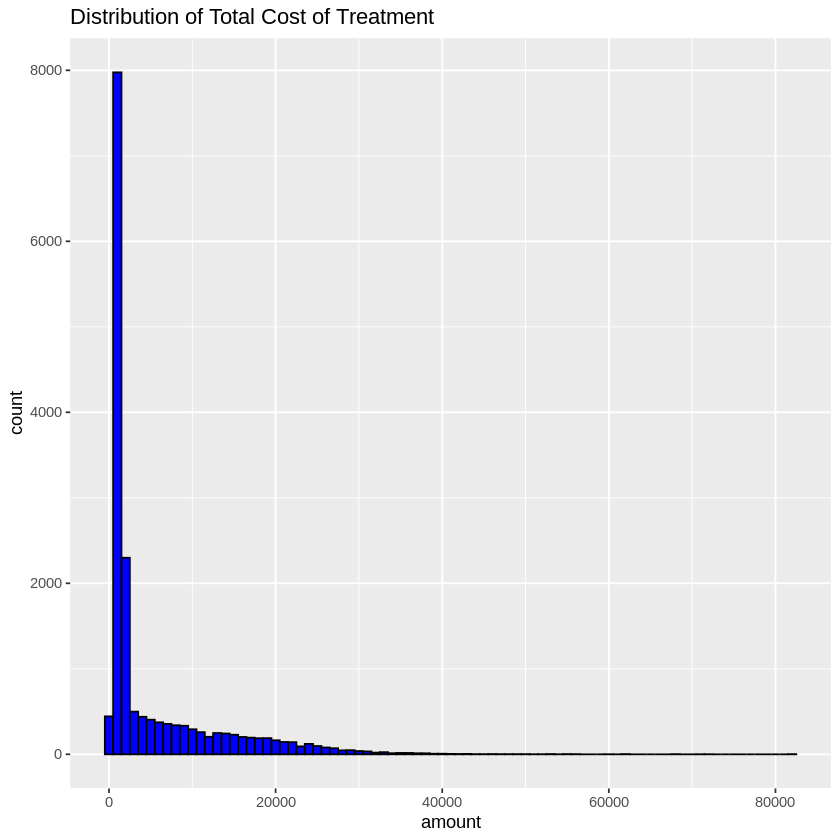

In [135]:
ggplot(merged_df, aes(x = amount)) +
  geom_histogram(binwidth = 1000, fill = "blue", color = "black") +
  labs(title = "Distribution of Total Cost of Treatment")

BiVariate Analysis

#Correlation Analysis

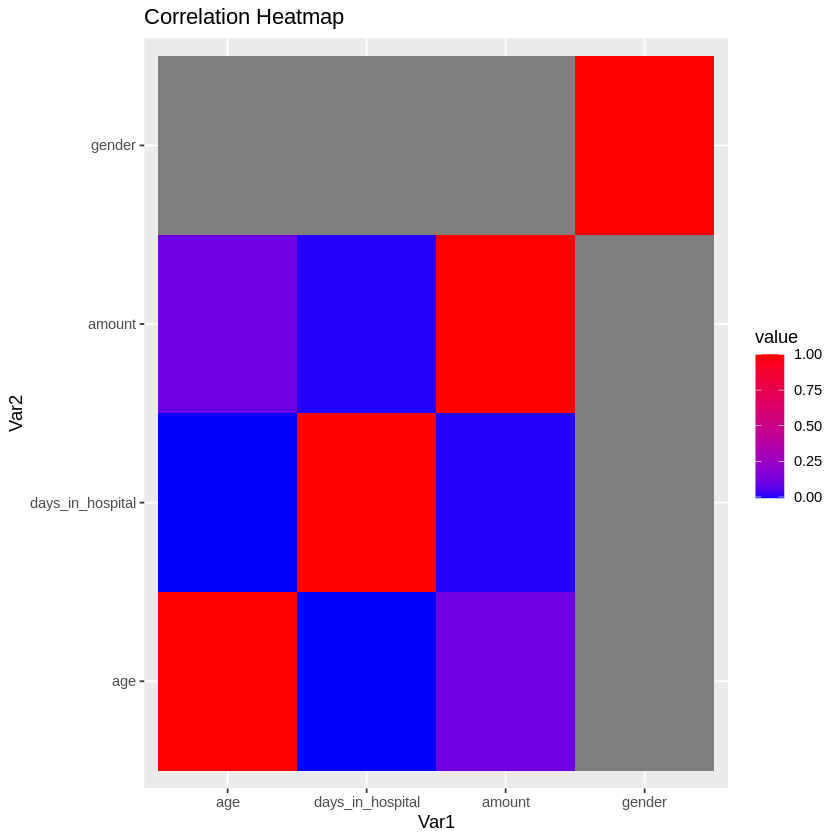

In [137]:
correlation_matrix <- cor(merged_df[, c("age", "days_in_hospital", "amount","gender")])

# Plot a correlation heatmap
library(reshape2)
melted_correlation <- melt(correlation_matrix)
ggplot(data = melted_correlation, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(title = "Correlation Heatmap")

#outlier Analysis

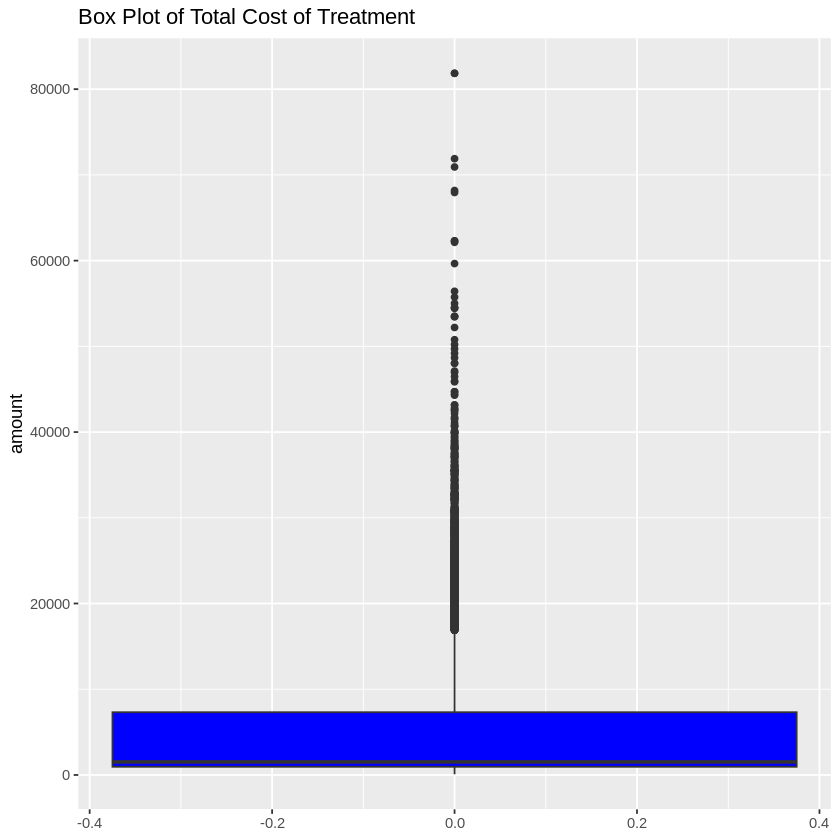

In [138]:
ggplot(merged_df, aes(y = amount)) +
  geom_boxplot(fill = "blue") +
  labs(title = "Box Plot of Total Cost of Treatment")

#Multivariate Analysis

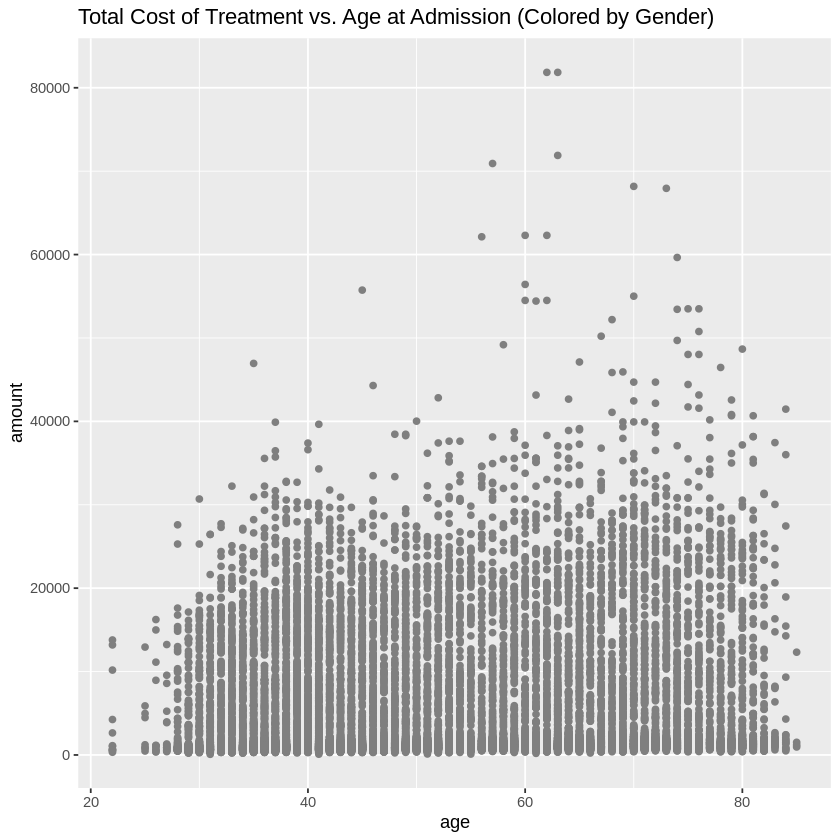

In [139]:
ggplot(merged_df, aes(x = age, y = amount, color = gender)) +
  geom_point() +
  labs(title = "Total Cost of Treatment vs. Age at Admission (Colored by Gender)")

#EDA with Medical history and symptoms Vs Amount

In [140]:
summary(merged_df)

  patient_id         total_amount       bill_id          date_of_admission.x 
 Length:16976       Min.   :  2946   Min.   :5.584e+05   Min.   :2011-01-01  
 Class :character   1st Qu.: 18062   1st Qu.:2.491e+09   1st Qu.:2012-03-26  
 Mode  :character   Median : 28792   Median :5.000e+09   Median :2013-07-08  
                    Mean   : 51460   Mean   :4.999e+09   Mean   :2013-07-02  
                    3rd Qu.: 74347   3rd Qu.:7.499e+09   3rd Qu.:2014-09-24  
                    Max.   :335283   Max.   :1.000e+10   Max.   :2015-12-28  
                                                                             
     amount            gender          race           date_of_birth       
 Min.   :   79.5   Min.   : NA     Length:16976       Min.   :1930-01-20  
 1st Qu.:  952.3   1st Qu.: NA     Class :character   1st Qu.:1948-04-06  
 Median : 1516.1   Median : NA     Mode  :character   Median :1962-08-12  
 Mean   : 5458.8   Mean   :NaN                        Mean   :1960-11-22  
 

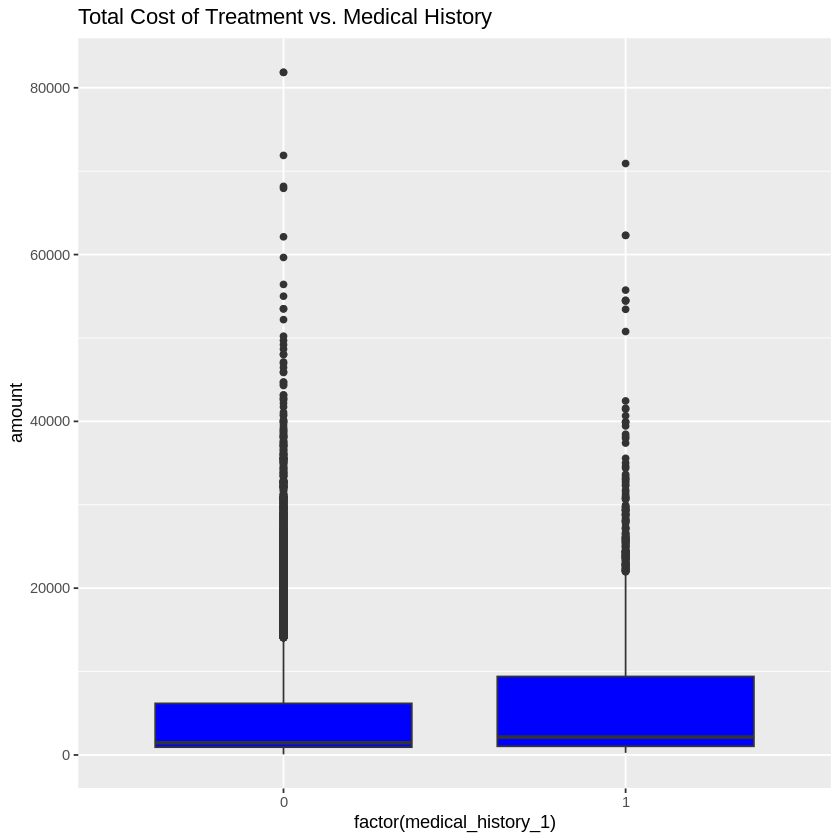

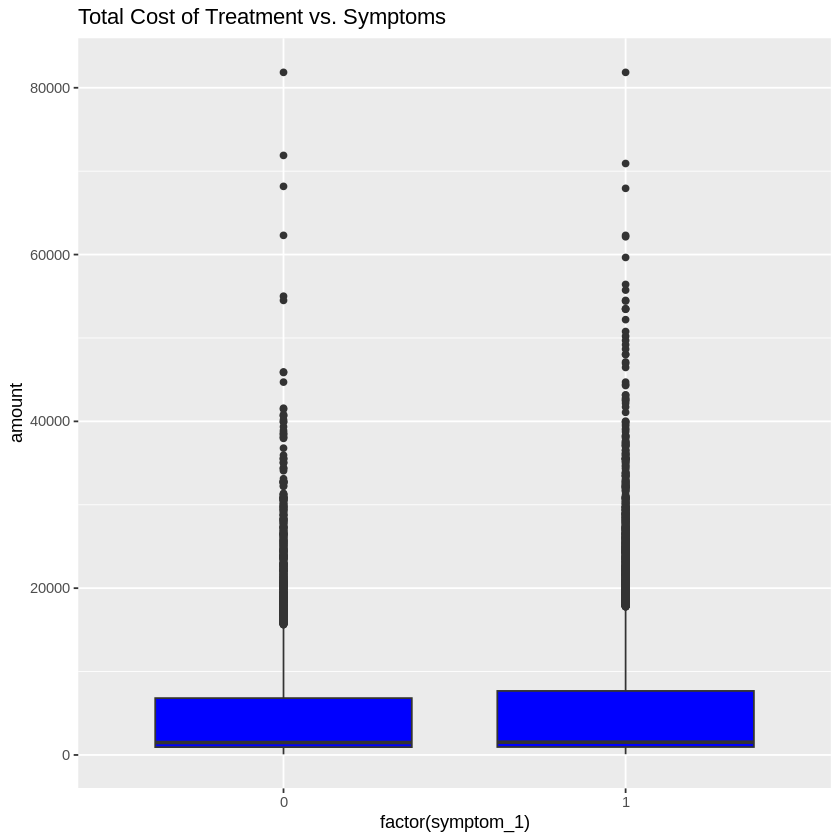

In [141]:

# Box plot for medical history vs. total cost of treatment
ggplot(merged_df, aes(x = factor(medical_history_1), y = amount, group = medical_history_1)) +
  geom_boxplot(fill = "blue") +
  labs(title = "Total Cost of Treatment vs. Medical History")

# Box plot for symptoms vs. total cost of treatment
ggplot(merged_df, aes(x = factor(symptom_1), y = amount, group = symptom_1)) +
  geom_boxplot(fill = "blue") +
  labs(title = "Total Cost of Treatment vs. Symptoms")

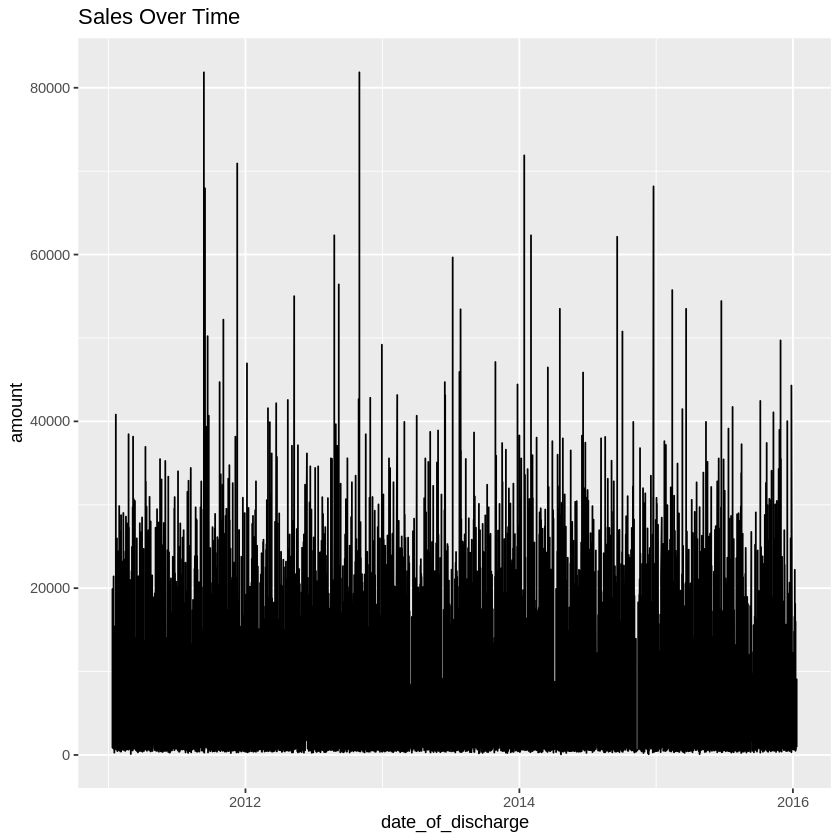

In [142]:
library(tidyverse)
merged_df %>%
  ggplot(aes(x = date_of_discharge, y = amount)) +
  geom_line() +
  labs(title = "Sales Over Time")


In [143]:
# Extract column names containing "medical_history"
medical_history_columns <- colnames(merged_df)[grepl("medical_history", colnames(merged_df))]

# Convert the extracted column names to a list
medical_history_column_list <- as.list(medical_history_columns)


In [144]:
colnames(merged_df)

[1] "patient_id"          "total_amount"        "bill_id"            
 [4] "date_of_admission.x" "amount"              "gender"             
 [7] "race"                "date_of_birth"       "date_of_admission.y"
[10] "date_of_discharge"   "medical_history_1"   "medical_history_2"  
[13] "medical_history_3"   "medical_history_4"   "medical_history_5"  
[16] "medical_history_6"   "medical_history_7"   "preop_medication_1" 
[19] "preop_medication_2"  "preop_medication_3"  "preop_medication_4" 
[22] "preop_medication_5"  "preop_medication_6"  "symptom_1"          
[25] "symptom_2"           "symptom_3"           "symptom_4"          
[28] "symptom_5"           "lab_result_1"        "lab_result_2"       
[31] "lab_result_3"        "weight"              "height"             
[34] "days_in_hospital"    "dob"                 "year_birth"         
[37] "year_adm"            "age"                 "chinese"            
[40] "indian"              "malay"               "others"             
[43] "foreigner"           "pr"                  "singaporean"        
[46] "m"                   "f"

In [145]:
summary(merged_df)

  patient_id         total_amount       bill_id          date_of_admission.x 
 Length:16976       Min.   :  2946   Min.   :5.584e+05   Min.   :2011-01-01  
 Class :character   1st Qu.: 18062   1st Qu.:2.491e+09   1st Qu.:2012-03-26  
 Mode  :character   Median : 28792   Median :5.000e+09   Median :2013-07-08  
                    Mean   : 51460   Mean   :4.999e+09   Mean   :2013-07-02  
                    3rd Qu.: 74347   3rd Qu.:7.499e+09   3rd Qu.:2014-09-24  
                    Max.   :335283   Max.   :1.000e+10   Max.   :2015-12-28  
                                                                             
     amount            gender          race           date_of_birth       
 Min.   :   79.5   Min.   : NA     Length:16976       Min.   :1930-01-20  
 1st Qu.:  952.3   1st Qu.: NA     Class :character   1st Qu.:1948-04-06  
 Median : 1516.1   Median : NA     Mode  :character   Median :1962-08-12  
 Mean   : 5458.8   Mean   :NaN                        Mean   :1960-11-22  
 

In [146]:
df_filtered= merged_df

#DATA Splitting


In [147]:
# Create a new feature: total_amount_by_patient
df_filtered <- df_filtered %>%
  group_by(patient_id) %>%
  mutate(total_amount_by_patient = sum(amount))

# Split the data into training and testing sets
set.seed(123)
train_indices <- sample(1:nrow(df_filtered), 0.7 * nrow(df_filtered))
train_data <- df_filtered[train_indices, ]
test_data <- df_filtered[-train_indices, ]

Missing Values

In [148]:
# Check for missing values in your dataset
missing_values <- colSums(is.na(train_data))
print(missing_values)

             patient_id            total_amount                 bill_id 
                      0                       0                       0 
    date_of_admission.x                  amount                  gender 
                      0                       0                   11883 
                   race           date_of_birth     date_of_admission.y 
                      0                       0                       0 
      date_of_discharge       medical_history_1       medical_history_2 
                      0                       0                     797 
      medical_history_3       medical_history_4       medical_history_5 
                      0                       0                    1067 
      medical_history_6       medical_history_7      preop_medication_1 
                      0                       0                       0 
     preop_medication_2      preop_medication_3      preop_medication_4 
                      0                       0    

# Random Forest with Variable Importance

In [150]:
# Load necessary libraries
library(randomForest)
library(dplyr)

# Load and preprocess your data (as shown in the previous example)

# Split the data into training and testing sets (as shown in the previous example)

# Create and train a Random Forest model using all available features
#model_rf_select=randomForest(total_amount_by_patient ~ age + weight + lab_result_2+lab_result_1+lab_result_3+height+days_in_hospital+year_adm+symptom_5+preop_medication_2+symptom_4, data = train_data)
model_rf <- randomForest(total_amount_by_patient ~ age+singaporean+pr+others+foreigner+indian+malay+chinese+m+medical_history_1+medical_history_3+medical_history_4+medical_history_6+medical_history_7+preop_medication_1+preop_medication_2 +preop_medication_3+preop_medication_4+preop_medication_5+preop_medication_6+symptom_1+symptom_2+symptom_3+symptom_4+symptom_5+lab_result_1+lab_result_2+lab_result_3+weight+year_adm+days_in_hospital+height, data = train_data)

# Make predictions
predictions_rf <- predict(model_rf, newdata = test_data)

# Evaluate the model
error_rf <- sqrt(mean((test_data$total_amount_by_patient - predictions_rf)^2))
cat("Random Forest RMSE:", error_rf)

# Variable Importance
var_importance <- importance(model_rf)
# Sort variable importance in descending order
sorted_var_importance <- var_importance[order(-var_importance[, 1]), ]

# Print the sorted variable importance
print(sorted_var_importance)


Random Forest RMSE: 4562.124            weight                age       lab_result_2             height 
      3.212893e+12       3.141321e+12       2.653310e+12       2.524753e+12 
      lab_result_1       lab_result_3   days_in_hospital           year_adm 
      2.459329e+12       2.247397e+12       1.499274e+12       1.013901e+12 
         foreigner              malay          symptom_5                  m 
      7.974783e+11       6.221604e+11       5.747602e+11       5.011311e+11 
           chinese  medical_history_1          symptom_4          symptom_2 
      4.837844e+11       4.538010e+11       4.125431e+11       4.011236e+11 
         symptom_1 preop_medication_4  medical_history_6          symptom_3 
      3.918884e+11       3.832037e+11       3.702312e+11       3.662395e+11 
preop_medication_2 preop_medication_5 preop_medication_1 preop_medication_6 
      3.654490e+11       3.438376e+11       3.273099e+11       3.122272e+11 
 medical_history_7 preop_medication_3        sin

# Random Forest with Important Features


In [151]:
# Load necessary libraries
library(randomForest)
library(dplyr)

# Load and preprocess your data (as shown in the previous example)

# Split the data into training and testing sets (as shown in the previous example)

# Create and train a Random Forest model using all available features
model_rf_select=randomForest(total_amount_by_patient ~ age + m+ chinese+foreigner+malay+weight + lab_result_2+lab_result_1+lab_result_3+height+days_in_hospital+year_adm+symptom_5+preop_medication_2+symptom_4, data = train_data)
#model_rf <- randomForest(total_amount_by_patient ~ age+gender+medical_history_1+medical_history_3+medical_history_4+medical_history_6+medical_history_7+preop_medication_1+preop_medication_2 +preop_medication_3+preop_medication_4+preop_medication_5+preop_medication_6+symptom_1+symptom_2+symptom_3+symptom_4+symptom_5+lab_result_1+lab_result_2+lab_result_3+weight+year_adm+days_in_hospital+height, data = train_data)

# Make predictions
predictions_rf <- predict(model_rf_select, newdata = test_data)

# Evaluate the model
error_rf <- sqrt(mean((test_data$total_amount_by_patient - predictions_rf)^2))
cat("Random Forest RMSE:", error_rf)

# Variable Importance
var_importance <- importance(model_rf)
print(var_importance)


Random Forest RMSE: 4670.666                   IncNodePurity
age                 3.141321e+12
singaporean         2.345970e+11
pr                  1.843854e+11
others              8.967974e+10
foreigner           7.974783e+11
indian              2.018090e+11
malay               6.221604e+11
chinese             4.837844e+11
m                   5.011311e+11
medical_history_1   4.538010e+11
medical_history_3   2.327725e+11
medical_history_4   1.115882e+11
medical_history_6   3.702312e+11
medical_history_7   3.033141e+11
preop_medication_1  3.273099e+11
preop_medication_2  3.654490e+11
preop_medication_3  2.972646e+11
preop_medication_4  3.832037e+11
preop_medication_5  3.438376e+11
preop_medication_6  3.122272e+11
symptom_1           3.918884e+11
symptom_2           4.011236e+11
symptom_3           3.662395e+11
symptom_4           4.125431e+11
symptom_5           5.747602e+11
lab_result_1        2.459329e+12
lab_result_2        2.653310e+12
lab_result_3        2.247397e+12
weight         

In [152]:
# Sort variable importance in descending order
sorted_var_importance <- var_importance[order(-var_importance[, 1]), ]

# Print the sorted variable importance
print(sorted_var_importance)

            weight                age       lab_result_2             height 
      3.212893e+12       3.141321e+12       2.653310e+12       2.524753e+12 
      lab_result_1       lab_result_3   days_in_hospital           year_adm 
      2.459329e+12       2.247397e+12       1.499274e+12       1.013901e+12 
         foreigner              malay          symptom_5                  m 
      7.974783e+11       6.221604e+11       5.747602e+11       5.011311e+11 
           chinese  medical_history_1          symptom_4          symptom_2 
      4.837844e+11       4.538010e+11       4.125431e+11       4.011236e+11 
         symptom_1 preop_medication_4  medical_history_6          symptom_3 
      3.918884e+11       3.832037e+11       3.702312e+11       3.662395e+11 
preop_medication_2 preop_medication_5 preop_medication_1 preop_medication_6 
      3.654490e+11       3.438376e+11       3.273099e+11       3.122272e+11 
 medical_history_7 preop_medication_3        singaporean  medical_history_3 

In [153]:
# Make predictions for the test data using the trained model
test_predictions <- predict(model_rf, newdata = test_data)

# For Regression (Total Cost Prediction) - Calculate RMSE (Root Mean Squared Error)
rmse <- sqrt(mean((test_data$total_amount_by_patient - test_predictions)^2))
cat("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 4562.124

In [154]:
colnames(test_data)

[1] "patient_id"              "total_amount"           
 [3] "bill_id"                 "date_of_admission.x"    
 [5] "amount"                  "gender"                 
 [7] "race"                    "date_of_birth"          
 [9] "date_of_admission.y"     "date_of_discharge"      
[11] "medical_history_1"       "medical_history_2"      
[13] "medical_history_3"       "medical_history_4"      
[15] "medical_history_5"       "medical_history_6"      
[17] "medical_history_7"       "preop_medication_1"     
[19] "preop_medication_2"      "preop_medication_3"     
[21] "preop_medication_4"      "preop_medication_5"     
[23] "preop_medication_6"      "symptom_1"              
[25] "symptom_2"               "symptom_3"              
[27] "symptom_4"               "symptom_5"              
[29] "lab_result_1"            "lab_result_2"           
[31] "lab_result_3"            "weight"                 
[33] "height"                  "days_in_hospital"       
[35] "dob"                     "year_birth"             
[37] "year_adm"                "age"                    
[39] "chinese"                 "indian"                 
[41] "malay"                   "others"                 
[43] "foreigner"               "pr"                     
[45] "singaporean"             "m"                      
[47] "f"                       "total_amount_by_patient"

In [167]:
# Create a new data frame with the same column names and structure as your training data
new_data <- data.frame(
  patient_id = '10a01',
total_amount = 00,
bill_id = 129873,
date_of_admission.x='2011-04-09',
amount = 00,
gender = 0,
race = 'Indian',
resident_status="India",
date_of_birth = '1986-04-09',
date_of_admission.y ='2011-04-09',
date_of_discharge = '2011-04-09',
medical_history_1 = 1,
medical_history_2= 1,
medical_history_3= 1,
medical_history_4 =0,
medical_history_5=0,
medical_history_6=1,
medical_history_7 =1,
preop_medication_1 = 1,
preop_medication_2 =1,
preop_medication_3 =0,
preop_medication_4 =1,
preop_medication_5=0,
preop_medication_6=0,
symptom_1=1,
symptom_2=1,
symptom_3=0,
symptom_4=1,
symptom_5=0,
lab_result_1=19.8,
lab_result_2=38.9,
lab_result_3 = 90,
weight=90,
height=176,
days_in_hospital =12,
dob = '1986-04-09',
year_birth=1986,
year_adm = 2011,
age =50,
total_amount_by_patient=00,
singaporean=00,
foreigner=00,
malay=01,
pr=0,
m=1,
others=0,
indian=0,
chinese=1
)
#total_amount_by_patient ~ age + m+ chinese+foreigner+malay+weight + lab_result_2+lab_result_1+lab_result_3+height+days_in_hospital+year_adm+symptom_5+preop_medication_2+symptom_4, data = train_data

In [168]:
# Predict using the trained Random Forest model
new_predictions_rf <- predict(model_rf, newdata = new_data)

# Display the predicted treatment cost
print(new_predictions_rf)

       1 
57748.82 


#Linear Regression VS Random Forest

In [169]:
# Load required libraries
library(randomForest)

# Linear Regression Model
lm_model <- lm(total_amount_by_patient ~ age + m+ chinese+foreigner+malay+weight + lab_result_2+lab_result_1+lab_result_3+height+days_in_hospital+year_adm+symptom_5+preop_medication_2+symptom_4, data = train_data)

# Predict using Linear Regression
predictions_lm <- predict(lm_model, newdata = test_data)

# Calculate RMSE for Linear Regression
rmse_lm <- sqrt(mean((predictions_lm - test_data$total_amount_by_patient)^2))

# Random Forest Model
rf_model <- randomForest(total_amount_by_patient ~ age + m+ chinese+foreigner+malay+weight + lab_result_2+lab_result_1+lab_result_3+height+days_in_hospital+year_adm+symptom_5+preop_medication_2+symptom_4, data = train_data, ntree = 100)

# Predict using Random Forest
predictions_rf <- predict(rf_model, newdata = test_data)

# Calculate RMSE for Random Forest
rmse_rf <- sqrt(mean((predictions_rf - test_data$total_amount_by_patient)^2))

# Variable Importance for Random Forest
var_importance_rf <- importance(rf_model)

# Print results
cat("Linear Regression Model:\n")
cat("RMSE:", rmse_lm, "\n")

cat("\nRandom Forest Model:\n")
cat("RMSE:", rmse_rf, "\n")



# Sort Variable Importance for Random Forest
sorted_var_importance_rf <- var_importance_rf[order(var_importance_rf[, 1], decreasing = TRUE), ]

# Display Variable Importance as a Table
cat("Variable Importance (Random Forest):\n")
print(sorted_var_importance_rf)



Linear Regression Model:
RMSE: 46485.02 

Random Forest Model:
RMSE: 4875.195 
Variable Importance (Random Forest):
            weight                age       lab_result_2             height 
      4.028754e+12       3.764697e+12       3.260287e+12       3.102436e+12 
      lab_result_1       lab_result_3   days_in_hospital           year_adm 
      3.048846e+12       2.782015e+12       1.912893e+12       1.259292e+12 
         foreigner              malay          symptom_5                  m 
      9.202235e+11       6.757611e+11       6.201058e+11       5.877388e+11 
           chinese          symptom_4 preop_medication_2 
      5.522846e+11       5.019441e+11       4.677962e+11 


In [171]:
install.packages("xgboost")
library(xgboost)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice


